In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

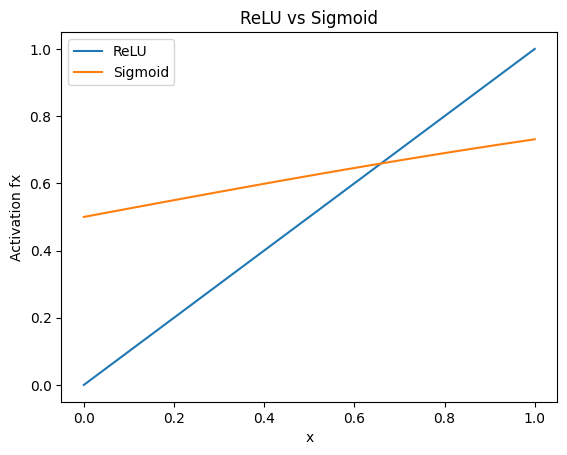

In [1]:
x = np.linspace(0,1,100)

relu = np.maximum(0,x)
sigmoid = 1/(1+np.exp(-x))

plt.plot(x,relu,label='ReLU')
plt.plot(x,sigmoid,label='Sigmoid')
plt.legend()
plt.title('ReLU vs Sigmoid')
plt.xlabel('x')
plt.ylabel('Activation fx')
plt.show()

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

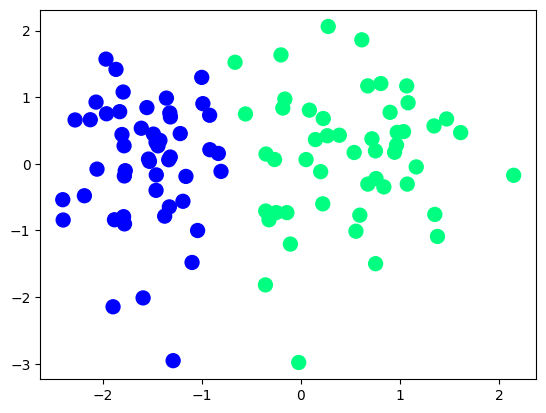

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def step(x):
    return 1 if x>=0 else 0

In [5]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    epochs = 1000
    
    for i in range(epochs):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights+lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [6]:
intercept_,coef_ = perceptron(X,y)

In [7]:
print(coef_)
print(intercept_)

[1.40969519 0.07113307]
0.9


In [8]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
print("slope: ",m)
print("Y-Intercept: ",b)

slope:  -19.81771767510093
Y-Intercept:  -12.652342150228058


In [9]:
x_input = np.linspace(-3,3,100)
y_input = m* x_input+ b

(-3.0, 2.0)

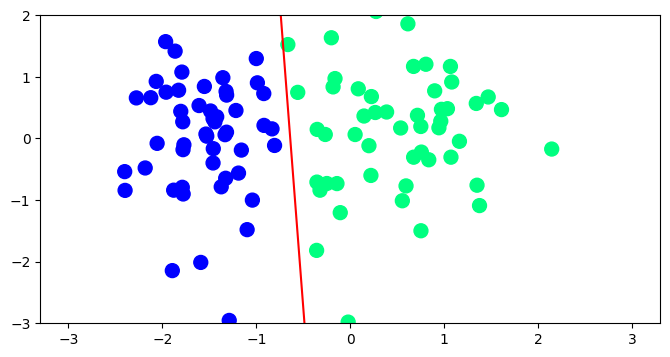

In [10]:
plt.figure(figsize=(8,4))
plt.plot(x_input,y_input,color='red')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [11]:
def perceptron(X,y):
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    epochs = 200
    
    for i in range(epochs):
        j  = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [12]:
m,b = perceptron(X,y)
print(m,b)

[-1.0, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.2258053501950907, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -1.6865169861072964, -2.13741165719625, -2.13741165719625, -2.13741165719625, -2.13741165719625, -2.13741165719625, -2.13741165719625, -2.13741165719625, -2.13741165719625, -

In [13]:
%matplotlib notebook
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


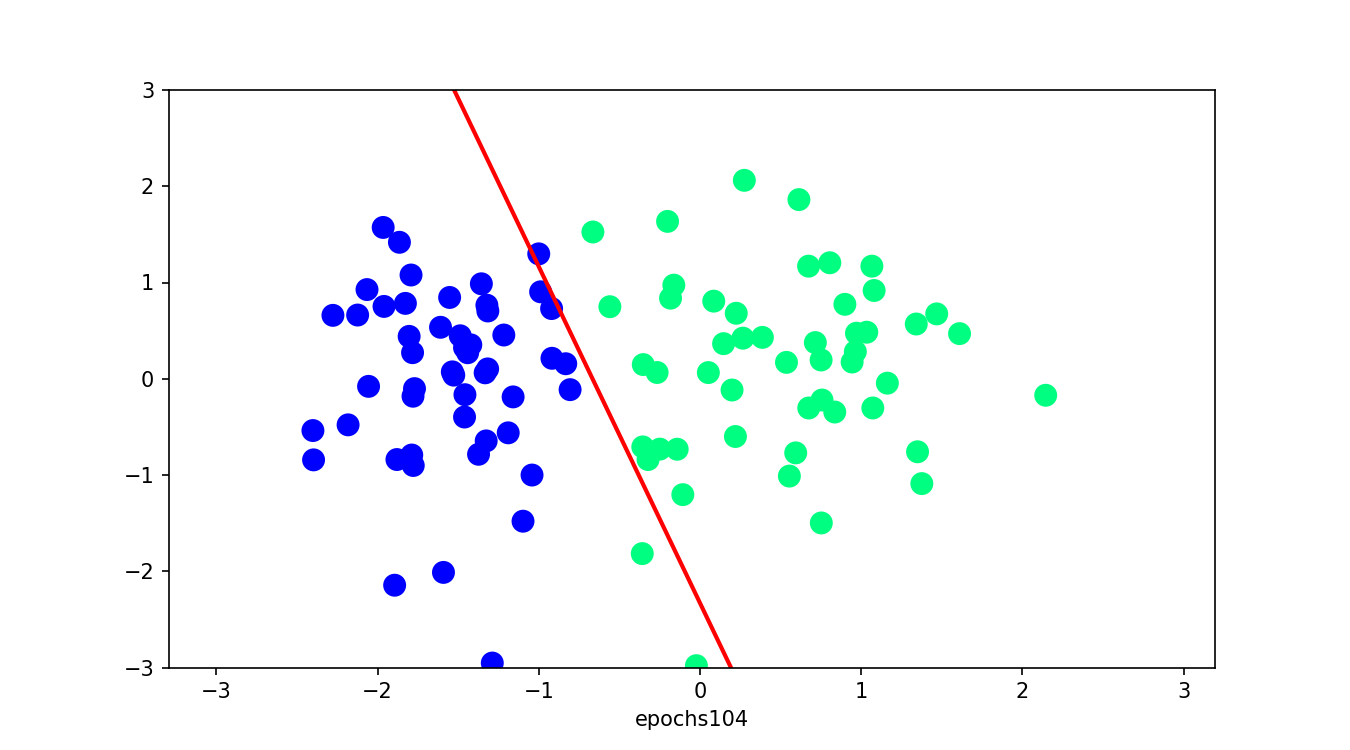

In [14]:
fig,ax = plt.subplots(figsize=(9,5))
x_i = np.arange(-3,3,0.1)
y_i = x_i*m[0] + b[0]

ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line,= ax.plot(x_i,x_i*m[0] + b[0],'r-',linewidth=2)
plt.ylim(-3,3)

def update(i):
    label = 'epochs{0}'.format(i+1)
    line.set_ydata(x_i*m[i]+b[i])
    ax.set_xlabel(label)
    
anim = FuncAnimation(fig,update,repeat=True,frames=200,interval=100)

# Problem with perceptron

In [31]:
and_data = pd.DataFrame()
or_data = pd.DataFrame()
xor_data = pd.DataFrame()

and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['output']=[1,0,0,0]

or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['output']=[1,1,1,0]

xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['output']=[0,1,1,0]

In [32]:
and_data

,input1,input2,output
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


In [33]:
or_data

,input1,input2,output
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


In [34]:
xor_data

,input1,input2,output
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

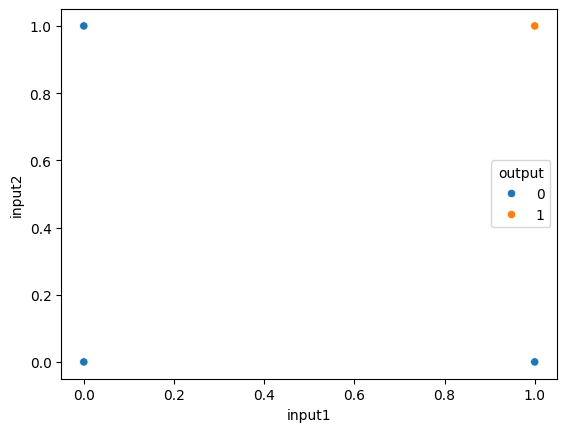

In [36]:
sns.scatterplot(data=and_data,x='input1',y='input2',hue='output')

<Axes: xlabel='input1', ylabel='input2'>

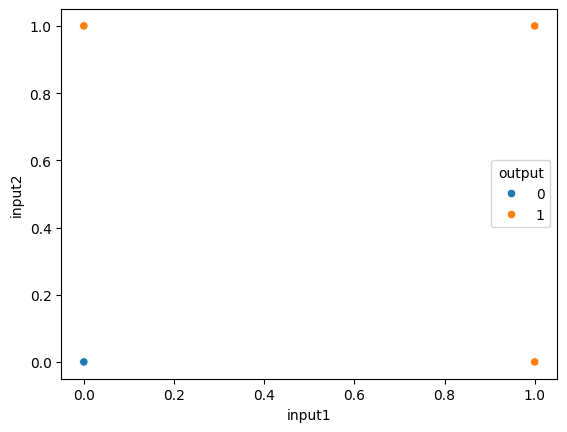

In [37]:
sns.scatterplot(data=or_data,x='input1',y='input2',hue='output')

<Axes: xlabel='input1', ylabel='input2'>

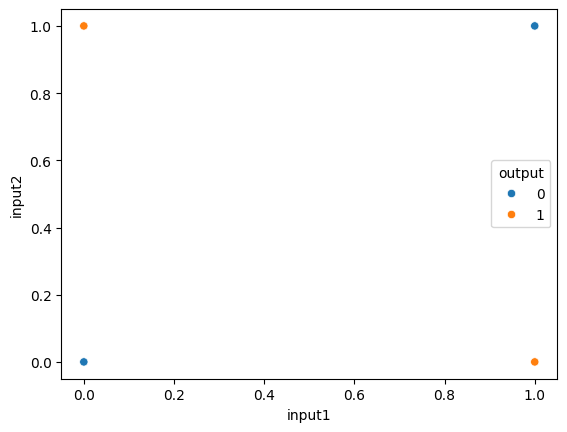

In [38]:
sns.scatterplot(data=xor_data,x='input1',y='input2',hue='output')

In [42]:
from sklearn.linear_model import Perceptron
clf1 = Perceptron()
clf2 = Perceptron()
clf3 = Perceptron()

In [44]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [45]:
print(clf1.coef_,clf1.intercept_)

[[2. 2.]] [-2.]


<Axes: xlabel='input1', ylabel='input2'>

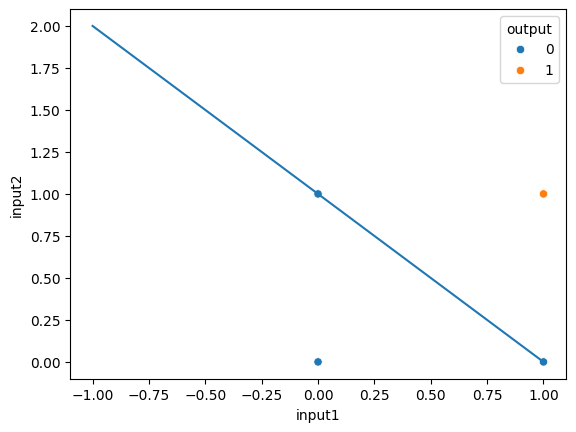

In [49]:
x = np.linspace(-1,1,5)
y = -x + 1

plt.plot(x,y)
sns.scatterplot(data=and_data,x='input1',y='input2',hue='output')

In [50]:
print(clf2.coef_,clf2.intercept_)

[[2. 2.]] [-1.]


<Axes: xlabel='input1', ylabel='input2'>

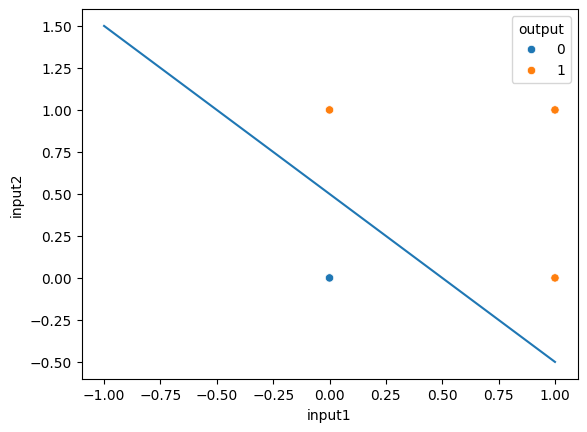

In [53]:
x1 = np.linspace(-1,1,5)
y1 = -x1 + 0.5

plt.plot(x1,y1)
sns.scatterplot(data=or_data,x='input1',y='input2',hue='output')

In [54]:
print(clf3.coef_,clf3.intercept_)

[[0. 0.]] [0.]


<Axes: xlabel='input1', ylabel='input2'>

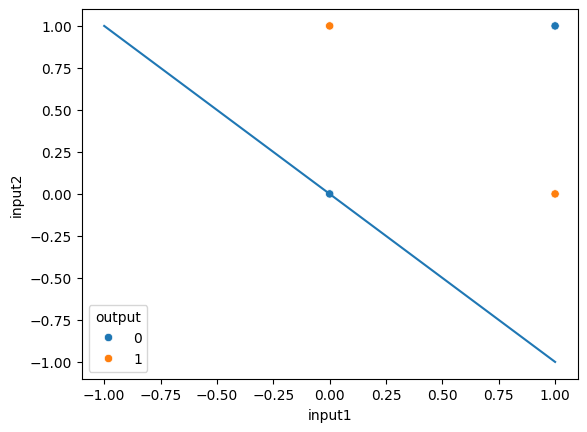

In [55]:
x2 = np.linspace(-1,1,5)
y2= -x2 

plt.plot(x2,y2)
sns.scatterplot(data=xor_data,x='input1',y='input2',hue='output')

<Axes: >

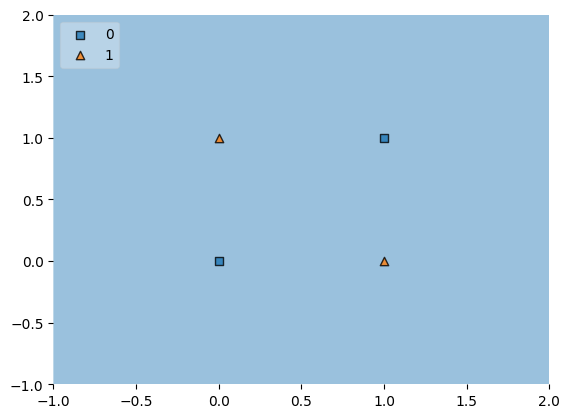

In [59]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values,clf = clf3, legend=2)